We import the necessary libraries and load the dataset into a DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the dataset from the filesystem
df = pd.read_csv('laptop_price - dataset (1).csv')
# Display the first few rows to verify the data
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


We will create a plot showing the prices of all laptops in the dataset.

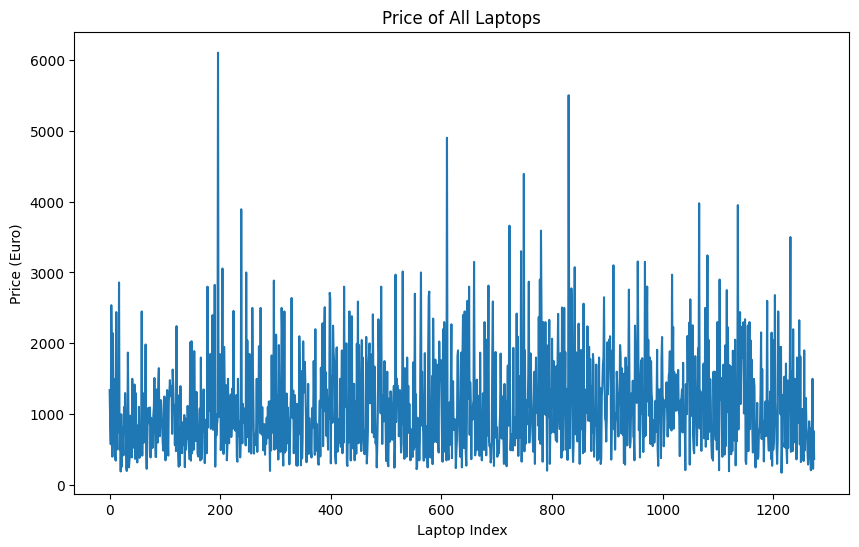

In [2]:
# Create a figure with a specific size for better visibility
plt.figure(figsize=(10, 6))

# Plot the price of all laptops  
plt.plot(df['Price (Euro)'])

# Adding mandatory titles and axis labels with units
plt.title('Price of All Laptops') 
plt.xlabel('Laptop Index') 
plt.ylabel('Price (Euro)') 

# Show the final plot
plt.show()

We calculate the average laptop price for each company and identify the most expensive one.

In [3]:
# Calculate the average price for each company 
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

# Print the results to the screen
print("Average laptop price for each company:")
print(avg_price_per_company)

# Identify which company has the most expensive laptop on average
most_expensive = avg_price_per_company.idxmax()
print(f"\nThe company with the most expensive laptop on average is: {most_expensive}")

Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptop on average is: Razer


We will identify unique operating systems, unify their names, and plot the price distribution for each.

Original OS types: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


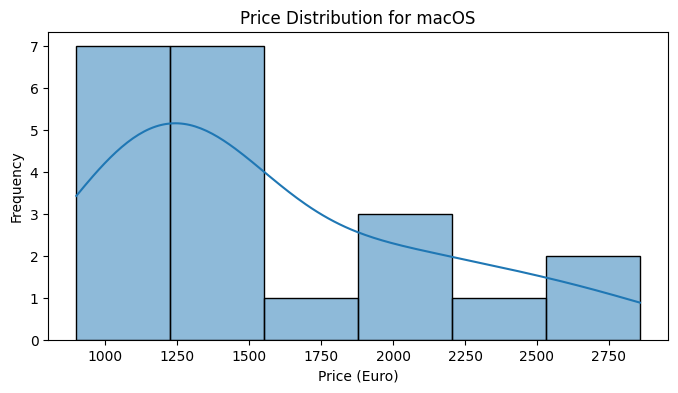

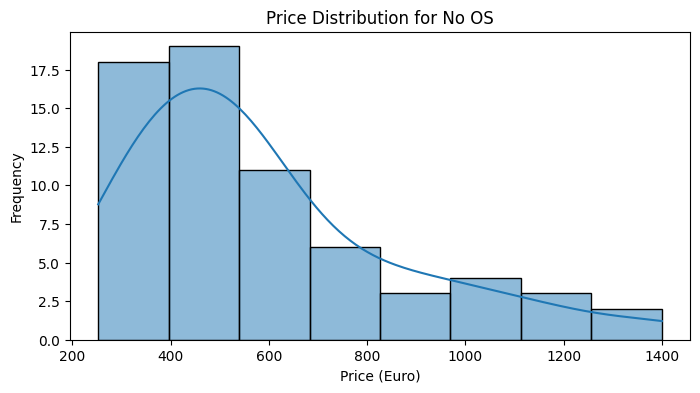

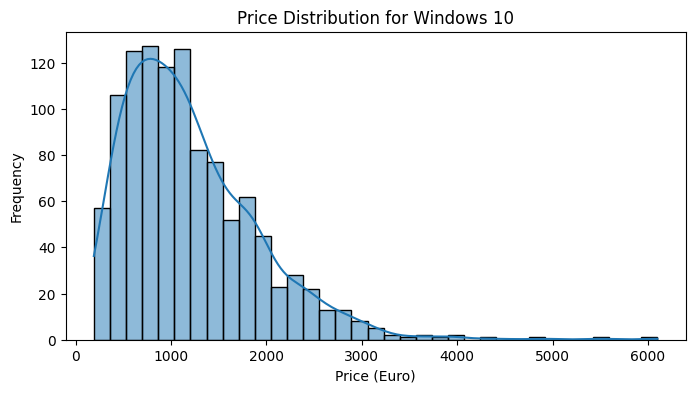

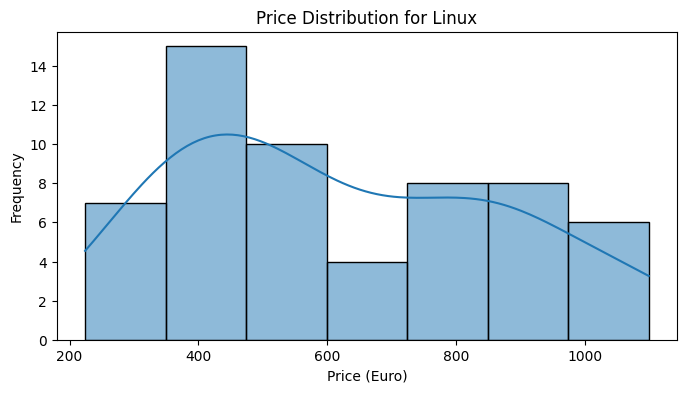

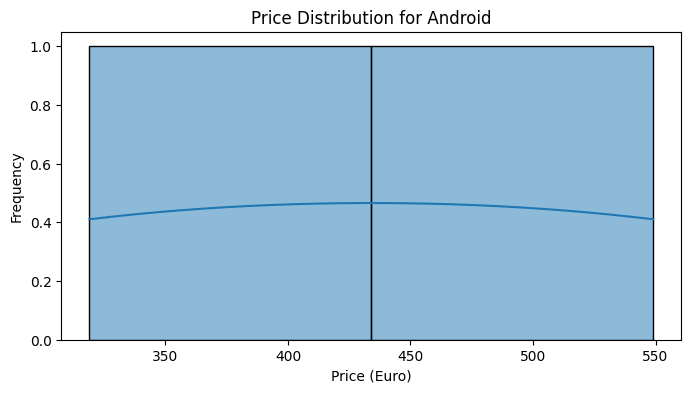

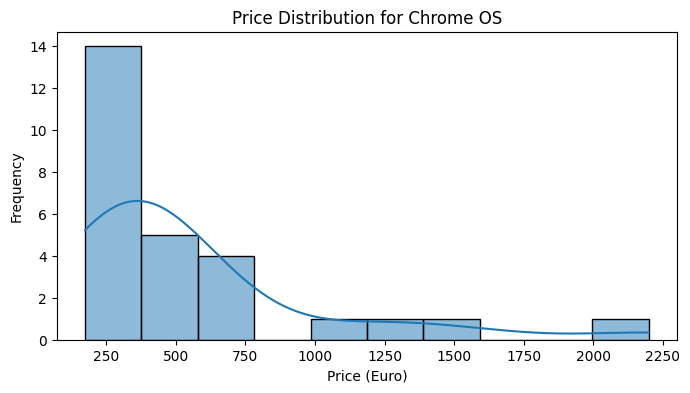

In [4]:
# Find different types of Operating Systems under "OpSys" column
print("Original OS types:", df['OpSys'].unique())

# Fix inconsistent names to ensure uniformity 
os_mapping = {
    'Windows 10 S': 'Windows 10',
    'Windows 7': 'Windows 10',
    'Mac OS X': 'macOS'
}
df['OpSys'] = df['OpSys'].replace(os_mapping)

# Plot price distribution for each unique operating system
unique_os = df['OpSys'].unique()
# Iterate through each OS and create a histogram
for os in unique_os:
    # Adding titles and labels for each subplot
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['OpSys'] == os]['Price (Euro)'], kde=True)
    plt.title(f'Price Distribution for {os}') 
    plt.xlabel('Price (Euro)') 
    plt.ylabel('Frequency') 
    plt.show()

We will analyze how the amount of RAM affects the laptop price using a scatter plot.
There is a strong positive correlation between RAM and price, where an increase in memory capacity leads to a significant jump in the laptop's cost.

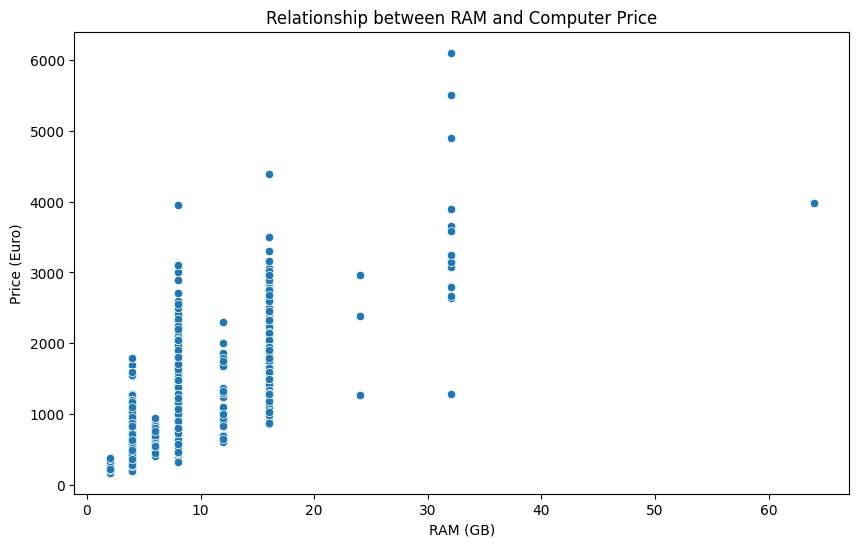

In [5]:
plt.figure(figsize=(10, 6))

# Create a scatter plot to analyze the relationship between RAM and price
sns.scatterplot(x=df['RAM (GB)'], y=df['Price (Euro)'])

# Adding titles and labels
plt.title('Relationship between RAM and Computer Price') 
plt.xlabel('RAM (GB)') 
plt.ylabel('Price (Euro)') 
plt.show()


An outlier is an observation that lies an abnormal distance from other values. We detect them using a Boxplot.

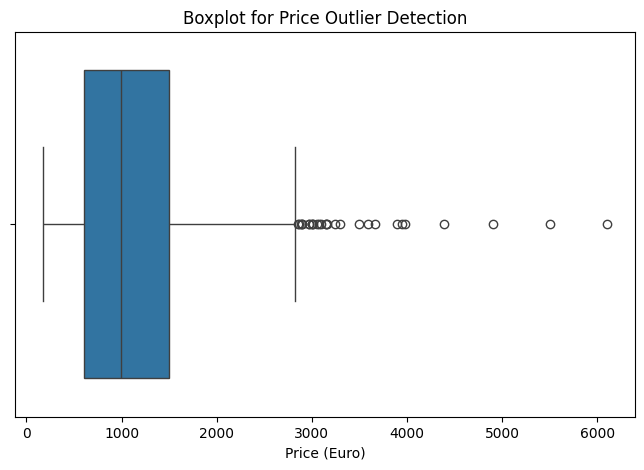

In [6]:
plt.figure(figsize=(8, 5))

# An outlier is a value significantly different from the rest of the data
# We detect them using a Boxplot or visual inspection of the distribution
sns.boxplot(x=df['Price (Euro)'])

plt.title('Boxplot for Price Outlier Detection') 
plt.xlabel('Price (Euro)') 
plt.show()

We extract the storage type from the "Memory" column.

In [7]:
# Function to extract storage type from the Memory string
def get_storage_type(memory_str):

    # Convert to string to avoid errors with non-text data
    memory_str = str(memory_str)
    
    # Check if 'SSD' is mentioned in the text
    if 'SSD' in memory_str:
        return 'SSD'
    

    # Check if 'HDD' is mentioned in the text
    elif 'HDD' in memory_str:
        return 'HDD'
    
    # Check if 'Flash Storage' is mentioned in the text
    elif 'Flash Storage' in memory_str:
        return 'Flash Storage'
    
    # Check if 'Hybrid' is mentioned in the text
    elif 'Hybrid' in memory_str:
        return 'Hybrid'
    
    # If no known type is found, return 'Other'
    else:
        return 'Other'

# Apply the function to the 'Memory' column to create the new 'Storage type' column
df['Storage type'] = df['Memory'].apply(get_storage_type)

# Display the first few rows to verify the results
print(df[['Memory', 'Storage type']].head())


                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
